In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
raw_data = pd.read_csv('lending_club_loan_two.csv')
raw_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [5]:
type(raw_data)

pandas.core.frame.DataFrame

In [6]:
raw_data.loan_amnt

0         10000.0
1          8000.0
2         15600.0
3          7200.0
4         24375.0
           ...   
396025    10000.0
396026    21000.0
396027     5000.0
396028    21000.0
396029     2000.0
Name: loan_amnt, Length: 396030, dtype: float64

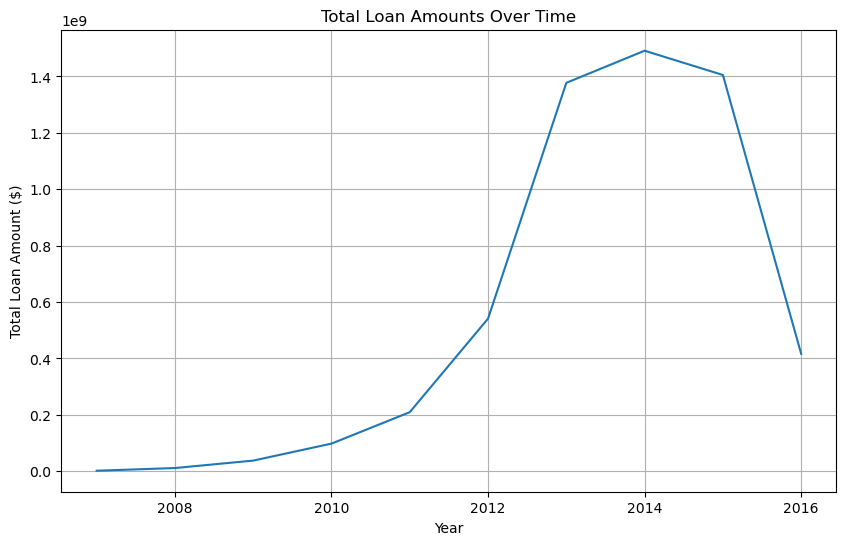

In [10]:
plt.figure(figsize=(10, 6))
raw_data['issue_d'] = pd.to_datetime(raw_data['issue_d'])  # Convert to datetime if needed
raw_data.groupby(raw_data['issue_d'].dt.year)['loan_amnt'].sum().plot(kind='line')
plt.title('Total Loan Amounts Over Time')
plt.xlabel('Year')
plt.ylabel('Total Loan Amount ($)')
plt.grid(True)
plt.show()


In [7]:
import pandas as pd

# Sample data
data = {
    'loan_amnt': [10000.0, 8000.0, 15600.0],
    'address': ['0174 Michelle Gateway\nMendozaberg, OK 22690',
                '1076 Carney Fort Apt. 347\nLoganmouth, SD 05113',
                '87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113']
}

# Create DataFrame
df_clean = pd.DataFrame(data)

# Split 'address' column into multiple columns
df_clean[['street_address', 'city_state_zip']] = df_clean['address'].str.split('\n', expand=True)

# Split 'city_state_zip' column into city, state, and zip code
df_clean[['city', 'state_zip']] = df_clean['city_state_zip'].str.split(', ', expand=True)

# Separate state and zip code
#df_clean[['state', 'zip_code']] = df_clean['state_zip'].str.rsplit(' ', 1, expand=True)
# Separate state and zip code
df_clean[['state', 'zip_code']] = df_clean['state_zip'].str.split(' ', expand=True)

# Drop unnecessary columns
df_clean.drop(['address', 'city_state_zip', 'state_zip'], axis=1, inplace=True)

# Print cleaned DataFrame
print(df_clean)

   loan_amnt             street_address         city state zip_code
0    10000.0      0174 Michelle Gateway  Mendozaberg    OK    22690
1     8000.0  1076 Carney Fort Apt. 347   Loganmouth    SD    05113
2    15600.0   87025 Mark Dale Apt. 269  New Sabrina    WV    05113


In [14]:
df_clean.index

RangeIndex(start=0, stop=3, step=1)

In [15]:
df_clean.columns

Index(['loan_amnt', 'street_address', 'city', 'state', 'zip_code', 'region'], dtype='object')

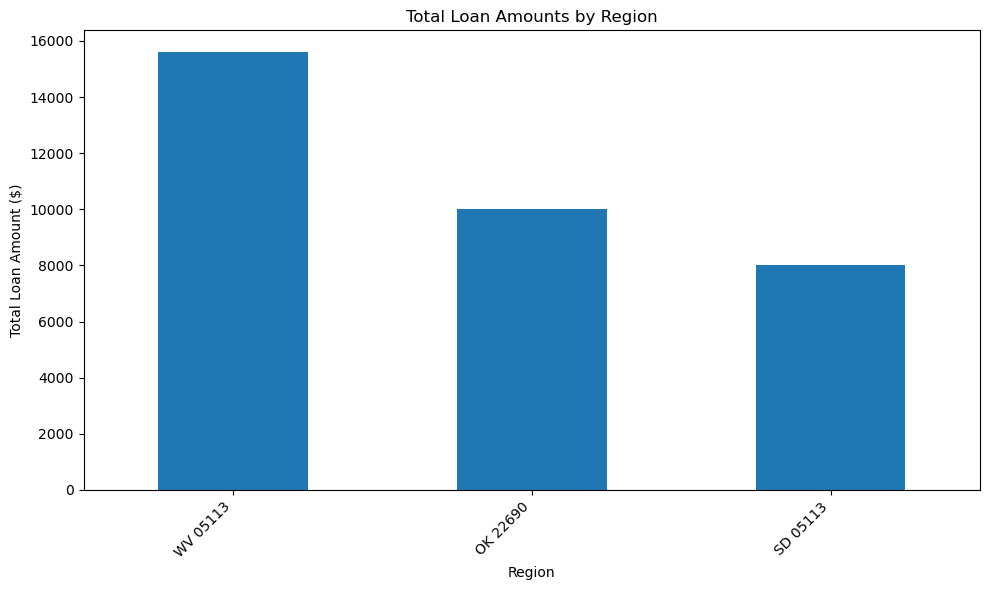

In [8]:
# Example: Plot loan amounts by region using a bar plot
plt.figure(figsize=(10, 6))
df_clean['region'] = df['address'].str.split(',').str[-1].str.strip()  # Extract region from address
loan_amount_by_region = df_clean.groupby('region')['loan_amnt'].sum().sort_values(ascending=False)
loan_amount_by_region.plot(kind='bar')
plt.title('Total Loan Amounts by Region')
plt.xlabel('Region')
plt.ylabel('Total Loan Amount ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

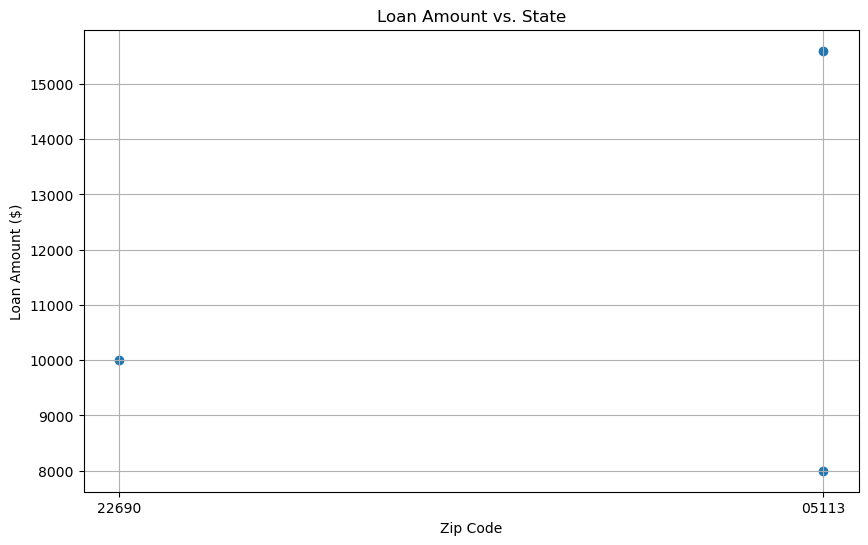

In [19]:
# Check if 'zip_code' column exists
if 'zip_code' in df_clean.columns:
    # Scatter plot of loan amount vs. zip code
    plt.figure(figsize=(10, 6))
    plt.scatter(df_clean['zip_code'], df_clean['loan_amnt'])
    plt.title('Loan Amount vs. State')
    plt.xlabel('Zip Code')
    plt.ylabel('Loan Amount ($)')
    plt.grid(True)
    plt.show()
else:
    print("The 'zip_code' column does not exist in the DataFrame.")

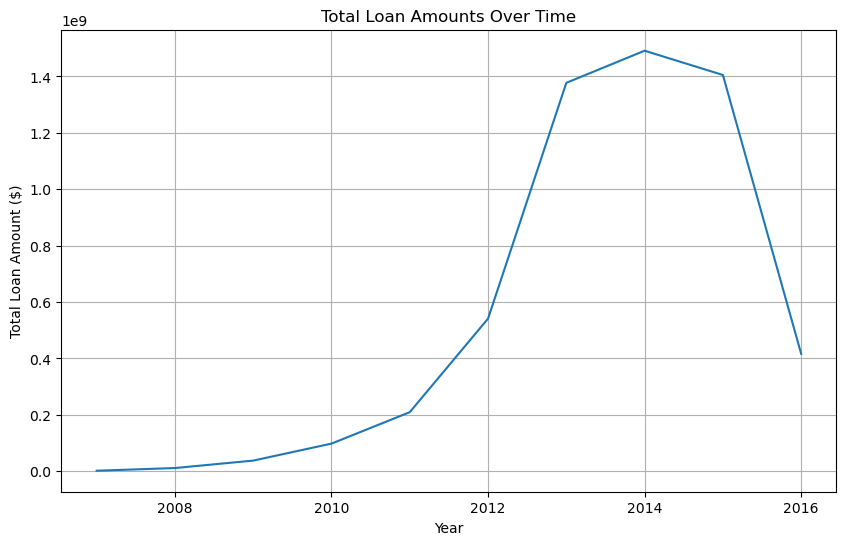

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df_raw = pd.read_csv('lending_club_loan_two.csv')

# Convert date column to datetime
df_raw['issue_d'] = pd.to_datetime(df['issue_d'])

# Plot total loan amounts over time
plt.figure(figsize=(10, 6))
df.groupby(df_raw['issue_d'].dt.year)['loan_amnt'].sum().plot(kind='line')
plt.title('Total Loan Amounts Over Time')
plt.xlabel('Year')
plt.ylabel('Total Loan Amount ($)')
plt.grid(True)
plt.show()


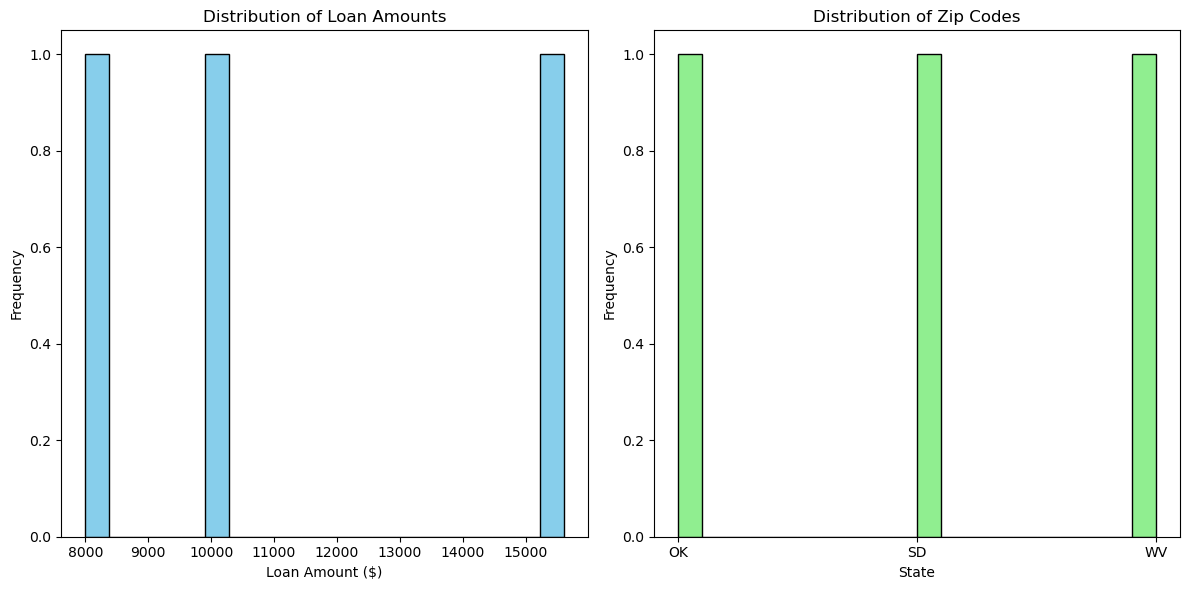

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


# Set up the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Histogram of loan amounts
axes[0].hist(df_clean['loan_amnt'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Loan Amounts')
axes[0].set_xlabel('Loan Amount ($)')
axes[0].set_ylabel('Frequency')

# Histogram of zip codes
axes[1].hist(df_clean['state'], bins=20, color='lightgreen', edgecolor='black')
axes[1].set_title('Distribution of Zip Codes')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()